#  Phase 2

Nama: Reyki Seprianza

Batch: FTDS-009


# i. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.
   > Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Reyki Seprianza**.

## Link Deployment Milestone 1
- [Link Frontend](https://ml2-rey-frontend.herokuapp.com/)
- [Link Backend](https://backend-p2-m1.herokuapp.com/)
- [Link Backend Api Category](https://backend-p2-m1.herokuapp.com/options)
   
## Assignment Objectives 
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## About Dataset 
- Data yang digunakan adalah dataset dari **Kaggle**. [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

   
- customerID
> - Customer ID

- gender
> - Whether the customer is a male or a female

- SeniorCitizen
> - Whether the customer is a senior citizen or not (1, 0)

- Partner
> - Whether the customer has a partner or not (Yes, No)

- Dependents
> - Whether the customer has dependents or not (Yes, No)

- tenure
> - Number of months the customer has stayed with the company

- PhoneService
> - Whether the customer has a phone service or not (Yes, No)

- MultipleLines
> - Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService
> - Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity
> - Whether the customer has online security or not (Yes, No, No internet service)

- OnlineBackup
> - Whether the customer has online backup or not (Yes, No, No internet service)

- DeviceProtection
> - Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport
> - Whether the customer has tech support or not (Yes, No, No internet service)

- StreamingTV
> - Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies
> - Whether the customer has streaming movies or not (Yes, No, No internet service)

- Contract
> - The contract term of the customer (Month-to-month, One year, Two year)

- PaperlessBilling
> - Whether the customer has paperless billing or not (Yes, No)

- PaymentMethod
> - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- MonthlyCharges
> - The amount charged to the customer monthly

- TotalCharges
> - The total amount charged to the customer

- Churn (Target)
> - Whether the customer churned or not (Yes or No)


# ii. Import Libraries

>Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from keras import layers, models, metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing, compose
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy



#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# iii. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
#definisi randomstate dan set display menampilkan seluruh kolom
random_state = 34
np.random.seed(random_state)
tf.random.set_seed(random_state)
pd.set_option('display.max_columns', None)

In [3]:
#load daataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#copy dataset
df0 = df.copy()

In [5]:
#melihat 5 data teratas
df0.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#melihat struktur data dan missing value
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#melihat dekskripsi data
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Sekilas data yang kita punya tidak ada missing value, tetapi pada column TotalCharges kita memiliki data yang tidak sesuai dengan format yang diberikan. maka akan di rubah terlebih dahulu menjadi float. dan kita juga mengecek apakah data yang kita punya ada missing value atau tidak.

In [8]:
#merubah data yang tidak sesuai dengan struktur data menjadi NaN
df0 = df0.replace(' ', np.nan).dropna()
#melakukan perubahan format TotalCharges
df0.TotalCharges = pd.to_numeric(df0.TotalCharges)


In [9]:
# mengecek missing value
df0.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

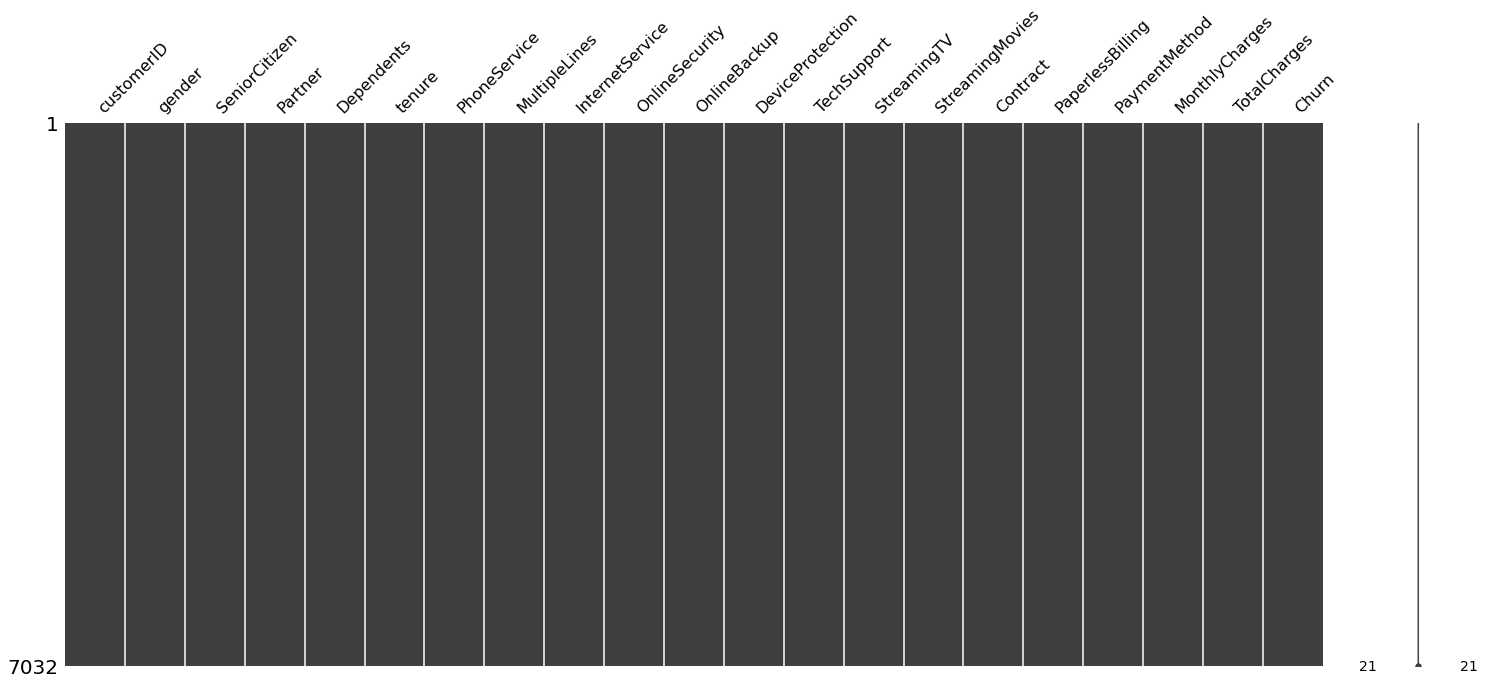

In [10]:
#Visualisasikan Missing value
msno.matrix(df0)

In [11]:
#Melihar persentasi missing value

(df0.isnull().sum()/len(df0))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Setelah di lakukan perubahan data, kita tidak menemukan missing value


In [12]:
# memisahkan data numerik dan categorical

num_cols = [col for col in df0.columns if df0[col].dtypes != 'O']
cat_cols = [col for col in df0.columns if df0[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Data kita di dominasi oleh Categorical Columns

In [13]:
# melihat cardinality dari feature categori, semakin tinggi cardinality menjadikan model kita semakin tidak baik

for var in cat_cols:
    
    print(var, ' berisi ', len(df[var].unique()), ' labels')

customerID  berisi  7043  labels
gender  berisi  2  labels
Partner  berisi  2  labels
Dependents  berisi  2  labels
PhoneService  berisi  2  labels
MultipleLines  berisi  3  labels
InternetService  berisi  3  labels
OnlineSecurity  berisi  3  labels
OnlineBackup  berisi  3  labels
DeviceProtection  berisi  3  labels
TechSupport  berisi  3  labels
StreamingTV  berisi  3  labels
StreamingMovies  berisi  3  labels
Contract  berisi  3  labels
PaperlessBilling  berisi  2  labels
PaymentMethod  berisi  4  labels
Churn  berisi  2  labels


Untuk cardinality data tidak ada masalah, dan customerID akan di drop karena tidak berguna.

In [14]:
#Drop column customerID
df0 = df0.drop(['customerID'], axis=1)

In [15]:
for column in df0.columns:
    print(f'{column} :', f'\n\t{df0[column].unique()}\n')

gender : 
	['Female' 'Male']

SeniorCitizen : 
	[0 1]

Partner : 
	['Yes' 'No']

Dependents : 
	['No' 'Yes']

tenure : 
	[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService : 
	['No' 'Yes']

MultipleLines : 
	['No phone service' 'No' 'Yes']

InternetService : 
	['DSL' 'Fiber optic' 'No']

OnlineSecurity : 
	['No' 'Yes' 'No internet service']

OnlineBackup : 
	['Yes' 'No' 'No internet service']

DeviceProtection : 
	['No' 'Yes' 'No internet service']

TechSupport : 
	['No' 'Yes' 'No internet service']

StreamingTV : 
	['No' 'Yes' 'No internet service']

StreamingMovies : 
	['No' 'Yes' 'No internet service']

Contract : 
	['Month-to-month' 'One year' 'Two year']

PaperlessBilling : 
	['Yes' 'No']

PaymentMethod : 
	['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Mon

In [17]:
df0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# iv. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Text(0.5, 1.0, 'Perbandingan Data Churn')

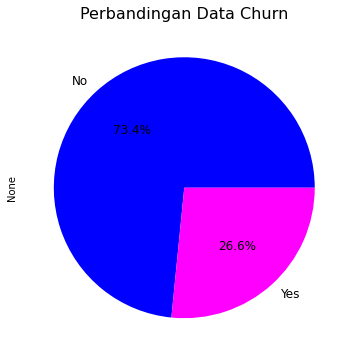

In [18]:
plt.figure(figsize=(10,10),facecolor='w')
colors = ['blue', 'magenta']
ax = (df0.groupby('Churn').size()/len(df0)).plot.pie(colors=colors, autopct='%1.1f%%', fontsize=12, figsize=(6, 6))
plt.title('Perbandingan Data Churn', fontsize=16)

Dari grafik di atas bisa kita lihat distribusi data chrun adalah 26.6% dan churned adalah 74.4%, kedepan kita akan melakukan handling imbalance data. 

Text(0.5, 1.0, 'Perbandingan Data Gender')

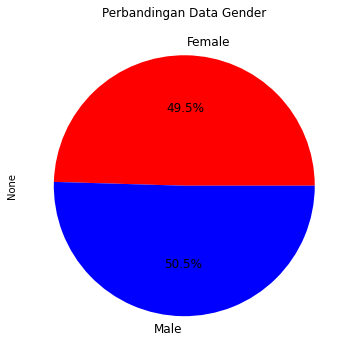

In [19]:
plt.figure(figsize=(10,10),facecolor='w')
colors = ['red', 'blue']
ax = (df0.groupby('gender').size()/len(df0)).plot.pie(colors=colors, autopct='%1.1f%%', fontsize=12, figsize=(6, 6))
plt.title('Perbandingan Data Gender')

Data yang kita memiliki distribusi gender yang hampir setara

Text(0.5, 1.0, 'Perbandingan Data Senior Citizen')

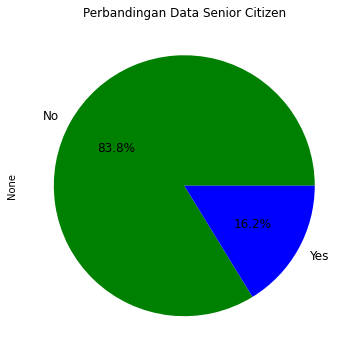

In [20]:
plt.figure(figsize=(10,10),facecolor='w')
colors = ['g', 'b']
ax = (df0.groupby('SeniorCitizen').size()/len(df0)).plot.pie(colors=colors,labels=['No','Yes'], autopct='%1.1f%%', fontsize=12, figsize=(6, 6))
plt.title('Perbandingan Data Senior Citizen')

Dari data yang kita miliki di dominasi oleh warga non Senior Citizen

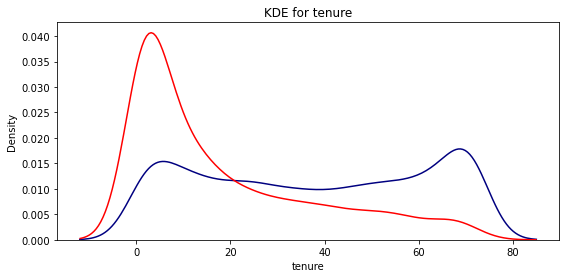

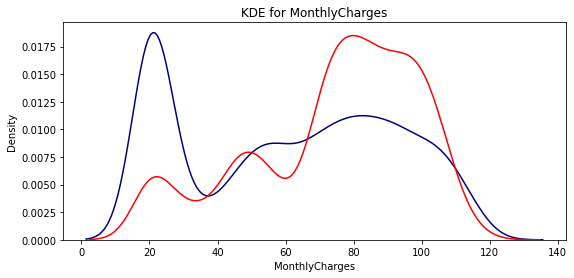

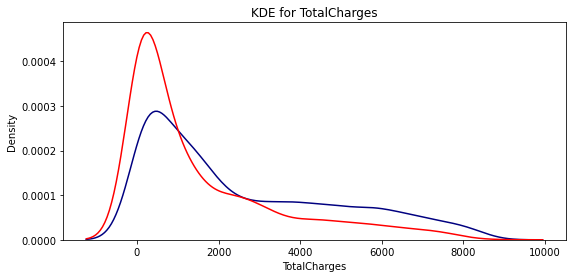

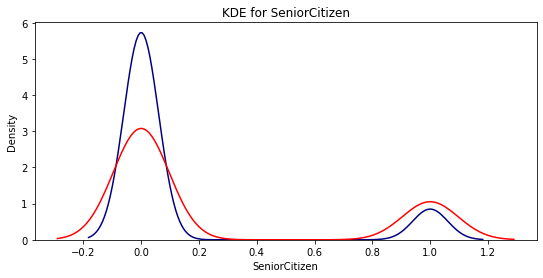

In [21]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df0[df0['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df0[df0['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
kdeplot('SeniorCitizen')

Dari grafik di atas bisa kita lihat pada
- tenure : Number of months the customer has stayed with the company -> saat awal terjadi churn tapi di fase akhir mengalami penurunan
- Monthly Charges : The amount charged to the customer monthly -> churn terjadi paling banyak pada angka 80
- Total Charges : The total amount charged to the customer -> churn terjadi paling banyak pada nominal charge kecil
- Senior Citizen : Whether the customer is a senior citizen or not (1, 0) -> 
    > - Pada Senior Citizen Churn terjadi lebih besar
    > - Pada Non Senior Citizen Churn terjadi lebih sedikit 

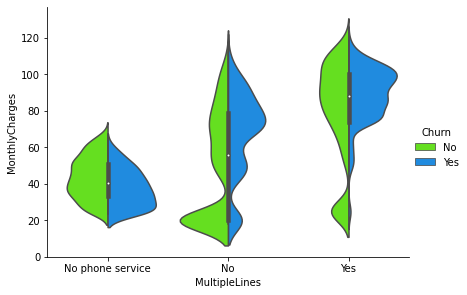

In [22]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="gist_rainbow", data=df0, height=4.2, aspect=1.4)

Bisa kita lihat di grafik di atas distribusi Monthly Charges dengan Multiple Lines:
- No phone service : saat berada di angka 20 tidak terjadi Churn, tetapi di angka 40 mulai terjadi churn
- No : Angka non churn terbesar terjadi pada angka 20
- Yes : Angka Churn terbesar terjadi pada angka 100

In [23]:
#fungsi menampilkan barplot
def barplotku(feature, orient='v', axis_name="Persentasi dari customer"):
    ratios = pd.DataFrame()
    g = df0.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df0)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

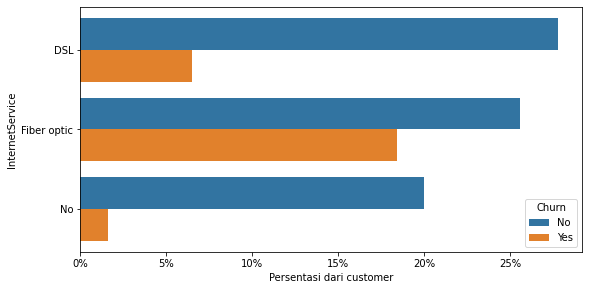

In [24]:
plt.figure(figsize=(9, 4.5))
barplotku("InternetService", orient="h")

Dari data di atas di dapatkan data customer terbanyak di data kita adalah yg menggunakan Fiber optic, namun di setiap sektor Churn = No sangat dominan

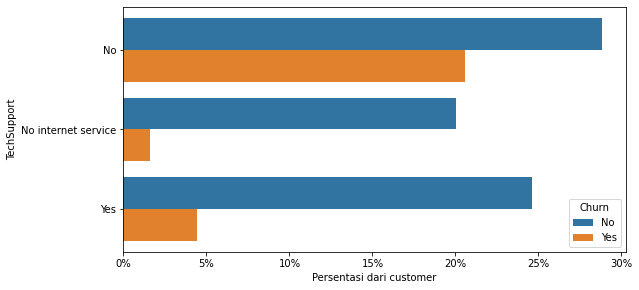

In [25]:
plt.figure(figsize=(9, 4.5))
barplotku("TechSupport", orient="h")

Dari data di atas bisa di lihat bahwa data kita sangat di dominasi oleh pelanggan yang tidak memiliki tech suport

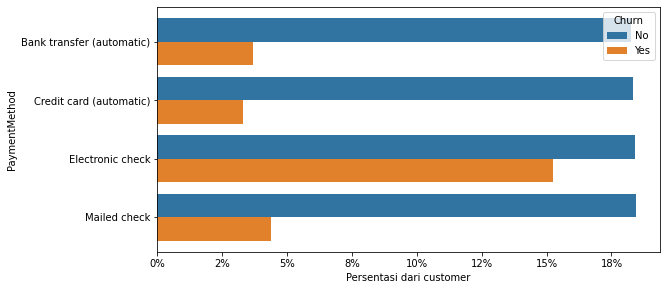

In [26]:
plt.figure(figsize=(9, 4.5))
barplotku("PaymentMethod", orient="h")

Pada data kita yang terbanyak mengalami Churn adalah yang menggunakan Electronic Check

# v. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


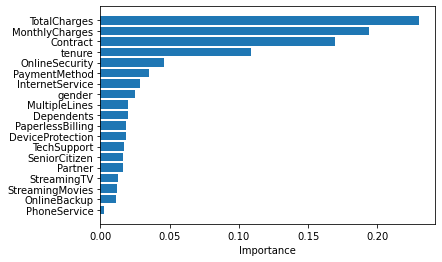

In [27]:
_df = df0.copy()
_df['Churn'] = _df['Churn'] == 'Yes'

for col in _df.columns:
    if _df[col].dtype == 'object':
        _df[col] = _df[col].astype('category').cat.codes

tree = DecisionTreeClassifier(random_state=13)
tree.fit(_df.drop(['Churn'], axis=1), _df['Churn'])
_result = pd.DataFrame(tree.feature_importances_, index=_df.drop(['Churn'], axis=1).columns, columns=['Importance']).sort_values('Importance')
plt.barh(_result.index, _result['Importance'])
plt.xlabel('Importance');

Dari grafik feature importance di atas bisa kita lihat bahwa data yang memiliki korelasi ke target `Churn` lebih dari 0.05 adalah TotalCharges, MonthlyCharges, Contract, tenure, dan OnlineSecurity.
`Maka` feature lainnya tidak akan di masukan ke dalam model.

In [28]:
df_ff = df0.drop(['PhoneService','OnlineBackup','StreamingMovies','StreamingTV','Partner','SeniorCitizen','TechSupport','DeviceProtection','PaperlessBilling','Dependents','MultipleLines','gender','InternetService','PaymentMethod'], axis=1)
df_ff.head()

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,29.85,29.85,No
1,34,Yes,One year,56.95,1889.50,No
2,2,Yes,Month-to-month,53.85,108.15,Yes
3,45,Yes,One year,42.30,1840.75,No
4,2,No,Month-to-month,70.70,151.65,Yes


Data yang kita miliki sudah siap di proses !

## 6.2 Data Splitting
 > bagian ini berisi proses pembagian data menjadi train-val-test

In [30]:
#memisahkan target dari data
X = df_ff.drop(['Churn'], axis=1)
y = df_ff['Churn'] == 'Yes'
# memecah data menjadi train, val dan test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,  X_val.shape, y_val.shape

((5060, 5), (5060,), (563, 5), (563,), (1406, 5), (1406,))

In [32]:
#Melakukan Oversampling kepada data yang imbalance
n_pos = y_train.sum()

sampler = RandomOverSampler(sampling_strategy={1: n_pos * 2})
X_train, y_train = sampler.fit_resample(X_train, y_train)
y_train.value_counts()

False    3725
True     2670
Name: Churn, dtype: int64

In [33]:
#memberikan weight kepada data
n_pos = y_train.sum()
n_neg = y_train.shape[0] - n_pos
total = n_pos + n_neg

class_weights = {0: (1 / n_neg) * (total / 2.0), 1: (1 / n_pos) * (total / 2.0)}
class_weights

{0: 0.8583892617449663, 1: 1.1975655430711611}

In [34]:
# memisahkan data numerik dan categorical pada X_train

num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['OnlineSecurity', 'Contract']


In [35]:
X_train[num_cols].nunique()

tenure              72
MonthlyCharges    1440
TotalCharges      4789
dtype: int64

In [36]:
X_test[cat_cols].nunique()

OnlineSecurity    3
Contract          3
dtype: int64

In [37]:
#pisahkan data menjadi feature categori dan numerik
X_train_cat = X_train[cat_cols]
X_train_num = X_train.drop(columns=cat_cols)

X_test_cat = X_test[cat_cols]
X_test_num = X_test.drop(columns=cat_cols)

## 6.3 Handling Outlier
 > bagian ini berisi proses penanganan outliers.

In [38]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed extreme
def find_extreme_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 3 * IQR
    lower_boundary = Q1 - 3 * IQR
    return upper_boundary, lower_boundary

In [39]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:
    col_skewness = X_train_num[column].skew()

    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      

    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
TotalCharges,Skewed,1.03,8327.45,-4472.55,8684.8,18.8,0.45


Outliers akan di handling menggunakan Column Transformation, atau dengan menggunakan metode outlier removal.

In [40]:
preprocessing_pipeline = compose.make_column_transformer(
    (preprocessing.PowerTransformer(), ['MonthlyCharges', 'TotalCharges', 'tenure']),
    (preprocessing.OneHotEncoder(), ['Contract','OnlineSecurity']),
)

In [41]:
#Melakukan proses powertransform dan onehotencoder
train_pp = preprocessing_pipeline.fit_transform(X_train), y_train
val_pp = preprocessing_pipeline.transform(X_val), y_val
test_pp = preprocessing_pipeline.transform(X_test), y_test

In [42]:
#menyimpan data ke dalam tf.data
train_ds = tf.data.Dataset.from_tensor_slices(train_pp).shuffle(10000).batch(256)
val_ds = tf.data.Dataset.from_tensor_slices(val_pp).batch(256)
test_ds = tf.data.Dataset.from_tensor_slices(test_pp).batch(256)

# vi. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


Metode **Sequential API**

In [43]:
#train the model
model = Sequential()
model.add(Dense(128, input_shape=(9,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [45]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy']) #defaultny matrics loss

# vii. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation

In [46]:
history = model.fit(train_ds, epochs=300, validation_data=val_ds)

Epoch 1/300
25/25 [==============================] - 2s 28ms/step - loss: 0.6842 - accuracy: 0.6070 - val_loss: 0.6571 - val_accuracy: 0.7539
Epoch 2/300
25/25 [==============================] - 0s 10ms/step - loss: 0.6278 - accuracy: 0.6658 - val_loss: 0.5265 - val_accuracy: 0.7745
Epoch 3/300
25/25 [==============================] - 0s 11ms/step - loss: 0.5901 - accuracy: 0.6602 - val_loss: 0.4900 - val_accuracy: 0.7617
Epoch 4/300
25/25 [==============================] - 0s 11ms/step - loss: 0.5605 - accuracy: 0.6774 - val_loss: 0.4674 - val_accuracy: 0.7653
Epoch 5/300
25/25 [==============================] - 0s 11ms/step - loss: 0.5593 - accuracy: 0.6970 - val_loss: 0.4675 - val_accuracy: 0.7624
Epoch 6/300
25/25 [==============================] - 0s 14ms/step - loss: 0.5413 - accuracy: 0.7077 - val_loss: 0.4605 - val_accuracy: 0.7717
Epoch 7/300
25/25 [==============================] - 0s 10ms/step - loss: 0.5435 - accuracy: 0.7030 - val_loss: 0.4499 - val_accuracy: 0.7646
Epoch 

# viii. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [47]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684175,0.607037,0.657054,0.753912
1,0.627806,0.665833,0.526452,0.774538
2,0.590126,0.660203,0.489960,0.761735
3,0.560468,0.677404,0.467400,0.765292
4,0.559293,0.696951,0.467523,0.762447


<AxesSubplot:>

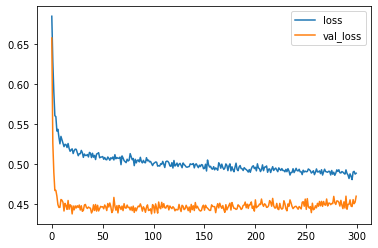

In [48]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

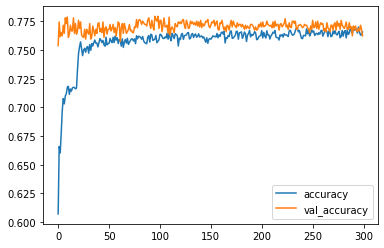

In [49]:
metrics[['accuracy','val_accuracy']].plot()

dari plot di atas bisa di simpulkan model sudah lumayan baik, tetapi akan di coba kembali dengan beberapa hyperparameter yang berbeda, yaitu dengan mengurangi layer yang ada

In [50]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(9,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                320       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                

In [52]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy']) #defaultny matrics loss

history = model.fit(train_ds, epochs=300, validation_data=val_ds)


Epoch 1/300
25/25 [==============================] - 2s 17ms/step - loss: 0.6810 - accuracy: 0.5761 - val_loss: 0.6176 - val_accuracy: 0.7454
Epoch 2/300
25/25 [==============================] - 0s 9ms/step - loss: 0.6441 - accuracy: 0.5805 - val_loss: 0.5568 - val_accuracy: 0.7454
Epoch 3/300
25/25 [==============================] - 0s 10ms/step - loss: 0.6126 - accuracy: 0.5875 - val_loss: 0.5048 - val_accuracy: 0.7824
Epoch 4/300
25/25 [==============================] - 0s 8ms/step - loss: 0.5864 - accuracy: 0.6707 - val_loss: 0.4799 - val_accuracy: 0.7866
Epoch 5/300
25/25 [==============================] - 0s 10ms/step - loss: 0.5755 - accuracy: 0.7151 - val_loss: 0.4699 - val_accuracy: 0.7710
Epoch 6/300
25/25 [==============================] - 0s 9ms/step - loss: 0.5655 - accuracy: 0.7349 - val_loss: 0.4706 - val_accuracy: 0.7553
Epoch 7/300
25/25 [==============================] - 0s 9ms/step - loss: 0.5592 - accuracy: 0.7376 - val_loss: 0.4677 - val_accuracy: 0.7496
Epoch 8/30

In [53]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.680972,0.576075,0.617553,0.745377
1,0.644106,0.580453,0.556769,0.745377
2,0.612644,0.587490,0.504760,0.782361
3,0.586426,0.670680,0.479909,0.786629
4,0.575453,0.715090,0.469934,0.770981


<AxesSubplot:>

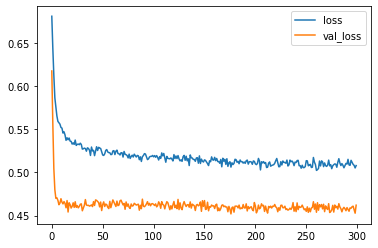

In [54]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

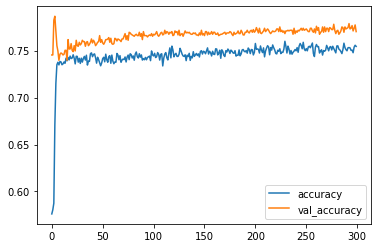

In [55]:
metrics[['accuracy','val_accuracy']].plot()

Model masih dinilai berlum terlalu baik jadi saya memutuskan kembali melakukan tunning memperkecil layer

In [56]:
#train the model
model = Sequential()
model.add(Dense(8, input_shape=(9,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 80        
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dropout_11 (Dropout)        (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [57]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy']) #defaultny matrics loss

history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.7592 - accuracy: 0.4549 - val_loss: 0.7506 - val_accuracy: 0.3421
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7141 - accuracy: 0.5162 - val_loss: 0.7079 - val_accuracy: 0.5676
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.5880 - val_loss: 0.6878 - val_accuracy: 0.6927
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.6155 - val_loss: 0.6757 - val_accuracy: 0.7383
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6702 - accuracy: 0.6475 - val_loss: 0.6670 - val_accuracy: 0.7525
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6602 - accuracy: 0.6646 - val_loss: 0.6589 - val_accuracy: 0.7532
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6561 - accuracy: 0.6711 - val_loss: 0.6504 - val_accuracy: 0.7617
Epoch 8/100


In [58]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.759232,0.454887,0.750571,0.342105
1,0.714148,0.516185,0.707885,0.567568
2,0.691493,0.587959,0.687800,0.692745
3,0.679686,0.615481,0.675706,0.738265
4,0.670216,0.647537,0.667036,0.752489


<AxesSubplot:>

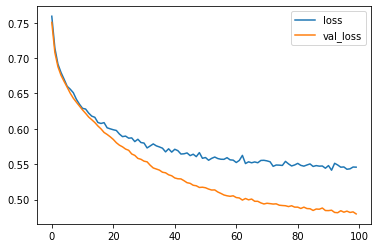

In [59]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

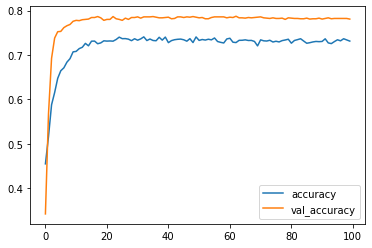

In [60]:
metrics[['accuracy','val_accuracy']].plot()

Sudah lebih baik namun akan di coba kita improve dengan di tune up kembali learning rate dan mencoba optimizer yang berbeda

In [61]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.15),
              metrics=['accuracy'],
              
              ) #defaultny matrics loss

history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.5408 - accuracy: 0.7307 - val_loss: 0.4779 - val_accuracy: 0.7817
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5454 - accuracy: 0.7326 - val_loss: 0.4782 - val_accuracy: 0.7824
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7242 - val_loss: 0.4725 - val_accuracy: 0.7802
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5385 - accuracy: 0.7387 - val_loss: 0.4761 - val_accuracy: 0.7809
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5494 - accuracy: 0.7190 - val_loss: 0.4726 - val_accuracy: 0.7809
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5468 - accuracy: 0.7284 - val_loss: 0.4689 - val_accuracy: 0.7838
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.7309 - val_loss: 0.4702 - val_accuracy: 0.7809
Epoch 8/100


In [62]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.540839,0.730727,0.477852,0.781650
1,0.545435,0.732604,0.478201,0.782361
2,0.550044,0.724159,0.472504,0.780228
3,0.538487,0.738702,0.476056,0.780939
4,0.549404,0.718999,0.472582,0.780939


<AxesSubplot:>

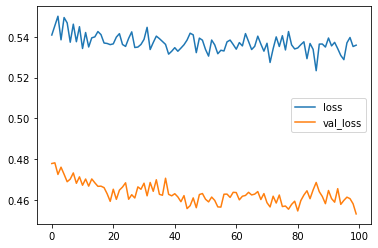

In [63]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

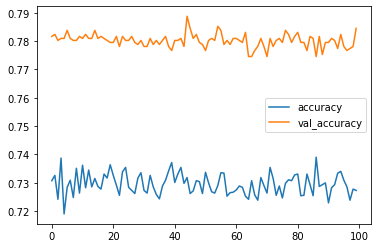

In [64]:
metrics[['accuracy','val_accuracy']].plot()

learning rate sangat tidak stabil jadi saya memutuskan menggunakan angka yg lebih kecil dan kembali menggunakan `Adam` optimizer

In [65]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'],
              
              ) #defaultny matrics loss

history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.5357 - accuracy: 0.7249 - val_loss: 0.4541 - val_accuracy: 0.7824
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5324 - accuracy: 0.7259 - val_loss: 0.4547 - val_accuracy: 0.7809
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5313 - accuracy: 0.7328 - val_loss: 0.4557 - val_accuracy: 0.7809
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5283 - accuracy: 0.7329 - val_loss: 0.4563 - val_accuracy: 0.7817
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7274 - val_loss: 0.4567 - val_accuracy: 0.7817
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.7245 - val_loss: 0.4570 - val_accuracy: 0.7817
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7292 - val_loss: 0.4574 - val_accuracy: 0.7809
Epoch 8/100


In [66]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.535677,0.724941,0.454066,0.782361
1,0.532446,0.725880,0.454713,0.780939
2,0.531254,0.732760,0.455732,0.780939
3,0.528339,0.732916,0.456328,0.781650
4,0.537643,0.727443,0.456721,0.781650


<AxesSubplot:>

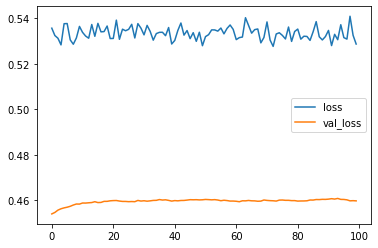

In [67]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

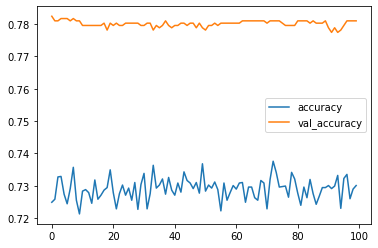

In [68]:
metrics[['accuracy','val_accuracy']].plot()

sepertinya ada yg aneh, terjadi vanishing gradient, setelah di analisis lagi ini terjadi karena model ini berjalan di atas model sebelumnya jadi `model harus di define ulang` setiap di re run !

In [69]:
#train the model
model = Sequential()
model.add(Dense(8, input_shape=(9,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 80        
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dropout_13 (Dropout)        (None, 4)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'],
              
              ) #defaultny matrics loss

history = model.fit(train_ds, epochs=100, validation_data=val_ds)


Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.6983 - accuracy: 0.4932 - val_loss: 0.6969 - val_accuracy: 0.5889
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6971 - accuracy: 0.5009 - val_loss: 0.6941 - val_accuracy: 0.6067
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.5095 - val_loss: 0.6912 - val_accuracy: 0.6259
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6884 - val_accuracy: 0.6422
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5201 - val_loss: 0.6855 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5262 - val_loss: 0.6826 - val_accuracy: 0.6771
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5334 - val_loss: 0.6795 - val_accuracy: 0.6906
Epoch 8/100


In [71]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.698258,0.493198,0.696889,0.588905
1,0.697117,0.500860,0.694082,0.606686
2,0.694848,0.509461,0.691197,0.625889
3,0.693089,0.511962,0.688431,0.642247
4,0.691670,0.520094,0.685503,0.665007


<AxesSubplot:>

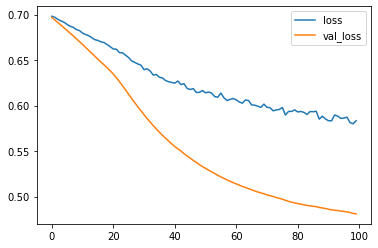

In [72]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

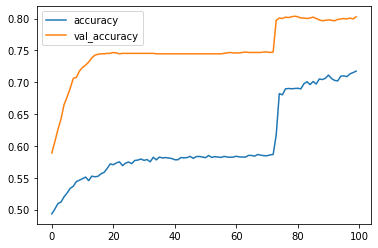

In [73]:
metrics[['accuracy','val_accuracy']].plot()

model kita masih belum stabil  tetapi epoch yang kita berikan sepertinya kurang jadi akan di berikan imporvement lagi kepada model

In [74]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(9,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                320       
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dropout_16 (Dropout)        (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 4)                

In [75]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'],
              
              ) #defaultny matrics loss

history = model.fit(train_ds, epochs=300, validation_data=val_ds)


Epoch 1/300
25/25 [==============================] - 2s 16ms/step - loss: 0.7676 - accuracy: 0.4449 - val_loss: 0.7854 - val_accuracy: 0.2667
Epoch 2/300
25/25 [==============================] - 0s 8ms/step - loss: 0.7546 - accuracy: 0.4502 - val_loss: 0.7672 - val_accuracy: 0.3023
Epoch 3/300
25/25 [==============================] - 0s 7ms/step - loss: 0.7417 - accuracy: 0.4579 - val_loss: 0.7530 - val_accuracy: 0.3599
Epoch 4/300
25/25 [==============================] - 0s 7ms/step - loss: 0.7328 - accuracy: 0.4658 - val_loss: 0.7412 - val_accuracy: 0.3698
Epoch 5/300
25/25 [==============================] - 0s 7ms/step - loss: 0.7240 - accuracy: 0.4735 - val_loss: 0.7315 - val_accuracy: 0.4011
Epoch 6/300
25/25 [==============================] - 0s 7ms/step - loss: 0.7168 - accuracy: 0.4846 - val_loss: 0.7228 - val_accuracy: 0.4232
Epoch 7/300
25/25 [==============================] - 0s 8ms/step - loss: 0.7085 - accuracy: 0.5065 - val_loss: 0.7153 - val_accuracy: 0.4374
Epoch 8/300


In [76]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.767642,0.444879,0.785395,0.266714
1,0.754595,0.450195,0.767236,0.302276
2,0.741719,0.457858,0.753025,0.359886
3,0.732757,0.465833,0.741170,0.369844
4,0.724021,0.473495,0.731508,0.401138


<AxesSubplot:>

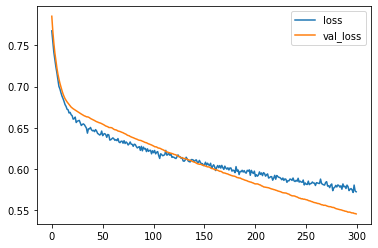

In [77]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

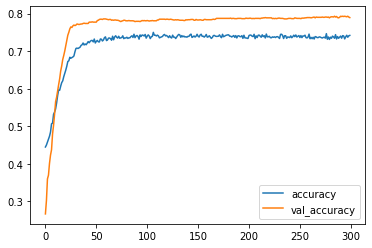

In [78]:
metrics[['accuracy','val_accuracy']].plot()

setelah beberapa kali melakukan percobaan tune up pada model saya memutuskan menggunakan settingan hyperparameter di bawah ini dengan menggunakan **Functional API** dan tanpa `drop out`

**Functional API**

In [79]:
# cara kedua Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

#Fungsi layer
data_in = Input(shape=(9,))
hidden_1 = Dense(128, activation= 'relu')(data_in)
hidden_2 = Dense(64, activation= 'relu')(hidden_1)
hidden_3 = Dense(32, activation= 'relu')(hidden_2)
hidden_4 = Dense(16, activation= 'relu')(hidden_3)
hidden_5 = Dense(8, activation= 'relu')(hidden_4)
hidden_6 = Dense(4, activation= 'relu')(hidden_5)
hidden_7 = Dense(2, activation= 'relu')(hidden_6)
out = Dense(1, activation = 'sigmoid')(hidden_7)

# jadikan satu 
model = Model(inputs=data_in, outputs=out)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_23 (Dense)            (None, 128)               1280      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 4)                 36    

In [80]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy']) #defaultny matrics loss

In [81]:
history = model.fit(train_ds, epochs=400, validation_data=val_ds)

Epoch 1/400
25/25 [==============================] - 3s 21ms/step - loss: 0.6906 - accuracy: 0.5684 - val_loss: 0.6920 - val_accuracy: 0.5775
Epoch 2/400
25/25 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.6449 - val_loss: 0.6909 - val_accuracy: 0.6302
Epoch 3/400
25/25 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.6854 - val_loss: 0.6894 - val_accuracy: 0.6693
Epoch 4/400
25/25 [==============================] - 0s 10ms/step - loss: 0.6763 - accuracy: 0.6982 - val_loss: 0.6882 - val_accuracy: 0.6785
Epoch 5/400
25/25 [==============================] - 0s 10ms/step - loss: 0.6697 - accuracy: 0.7127 - val_loss: 0.6869 - val_accuracy: 0.6927
Epoch 6/400
25/25 [==============================] - 0s 10ms/step - loss: 0.6631 - accuracy: 0.7174 - val_loss: 0.6868 - val_accuracy: 0.7013
Epoch 7/400
25/25 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.7292 - val_loss: 0.6866 - val_accuracy: 0.7119
Epoch 8

In [82]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.690552,0.568413,0.692027,0.577525
1,0.686776,0.644879,0.690893,0.630156
2,0.681978,0.685379,0.689384,0.669275
3,0.676251,0.698202,0.688240,0.678521
4,0.669681,0.712744,0.686944,0.692745


<AxesSubplot:>

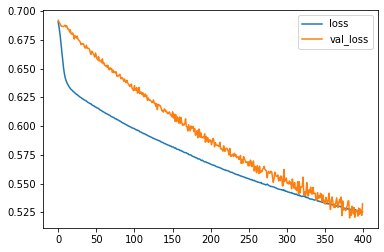

In [83]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

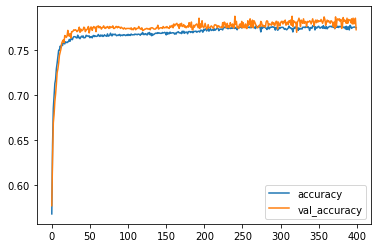

In [84]:
metrics[['accuracy','val_accuracy']].plot()

saya memutuskan model terakhir yang kita gunakan adalah model yang akan kita save dan di deploy

In [105]:
# Testing Model dengan data test
import numpy as np
from sklearn.metrics import classification_report
y_pred = model.predict(test_pp[0])
y_pred= np.where (y_pred > .5, 1,0)
print(classification_report(test_pp[1],y_pred))

              precision    recall  f1-score   support

       False       0.87      0.77      0.82       388
        True       0.59      0.74      0.66       175

    accuracy                           0.76       563
   macro avg       0.73      0.76      0.74       563
weighted avg       0.78      0.76      0.77       563



Model kita mendapatkan F1 score ACC 76%, False 82% dan True 66%

# ix. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.



In [ ]:
# simpan prep 

import pickle
f= open('preprocesing.pkl', 'wb') #wb = write binary, rb = read binary
pickle.dump(preprocessing_pipeline, f)
f.close()



In [ ]:
# simpan model
from tensorflow.keras.models import load_model,save_model
model.save('modell.h5')
save_model(model, 'modell.h5')

In [116]:
# api untuk backend (api ini berisi pilihan categorical yang ada untuk di tampilkan pada front end)
import pickle

options = {}
for col in df_ff.select_dtypes(exclude=['number']).columns:
    options[col] = list(df_ff[col].unique())

f= open('options.pkl', 'wb') #wb = write binary, rb = read binary
pickle.dump(options, f)
f.close()


# x. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [111]:
df_ff

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,29.85,29.85,No
1,34,Yes,One year,56.95,1889.50,No
2,2,Yes,Month-to-month,53.85,108.15,Yes
3,45,Yes,One year,42.30,1840.75,No
4,2,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,24,Yes,One year,84.80,1990.50,No
7039,72,No,One year,103.20,7362.90,No
7040,11,Yes,Month-to-month,29.60,346.45,No
7041,4,No,Month-to-month,74.40,306.60,Yes


In [106]:
#membuat inference sesuai features yang kita gunakan
df= pd.DataFrame([{'tenure': 2, 'OnlineSecurity': 'Yes', 'Contract': 'Month-to-month', 'MonthlyCharges': 98.0, 'TotalCharges': 1098.0}])
df

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,2,Yes,Month-to-month,98.0,1098.0


In [107]:
inf_pp = preprocessing_pipeline.transform(df)
inf_pp.shape

(1, 9)

In [108]:
# Inference
import numpy as np
from sklearn.metrics import classification_report
y_pred = model.predict(inf_pp)
y_pred= np.where (y_pred > .5, 1,0)
y_pred

array([[1]])

Model inference yang kita dapatkan mengeluarkan hasil 1, atau Churn

# xi. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

> Dari percobaan yang saya lakukan untuk memperdalam konsep deep learning, saya menyimpulkan
> - Naik turunnya performa yang terlalu signifikan = learning rate harus di tune up lebih kecil, 
> - Modelnya masih belum memahami data train dengan baik (underfit) = perdalam  layer, 
> - Modelnya menghafal train test terlalu baik (overfit) = neuron di perkecil, layer di perdangkal atau di lakukan drop out agar neuron tidak terkoneksi semua
> - Grafik terpisah atau belum berhimpit = seting kembali epoch
> - Epoch terlalu lama berjalan = epoch di perkecil atau batch di perbesar

> Model terbaik yang sudah di buat sejauh ini adalah model dengan
> - 7 hidden layer
> - Optimizer Adam dengan learning rate 0.0001 atau 1e-4
> - Epoch = 400

> Model yang digunakan menggunakan Features
> - TotalCharges
> - MonthlyCharges
> - Tenure
> - Contract
> - OnlineSecurity